In [4]:
from helper import *    
import seaborn as sns
import os

In [9]:
folder_path = './datasets/radar_data/'
# filtered_file = sorted([content for content in os.listdir(folder_path) if content.startswith("drone")])
filtered_file = bin_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.bin') and not f.startswith('only_sensor')]

# List all the contents of the folder
for file in filtered_file:
    print(file)

drone_2024-09-10_11_11_13_test.bin
drone_2024-09-10_12_02_19_test.bin
drone_2024-09-10_16_12_18_test.bin


In [2]:
def point_cloud_frames(file_name = None):
    info_dict = get_info(file_name)
    run_data_read_only_sensor(info_dict)
    bin_filename = './datasets/radar_data/only_sensor_' + info_dict['filename'][0]
    bin_reader = RawDataReader(bin_filename)
    total_frame_number = int(info_dict[' Nf'][0])
    pointCloudProcessCFG = PointCloudProcessCFG()
    velocities = []
    pcds = []
    for frame_no in range(total_frame_number):
        bin_frame = bin_reader.getNextFrame(pointCloudProcessCFG.frameConfig)
        np_frame = bin2np_frame(bin_frame)
        frameConfig = pointCloudProcessCFG.frameConfig
        reshapedFrame = frameReshape(np_frame, frameConfig)
        rangeResult = rangeFFT(reshapedFrame, frameConfig)
        if frame_no == 5:
            range_heatmap = np.sum(np.abs(rangeResult), axis=(0,1))
            print("range_heatmap.shape: ", range_heatmap.shape)
            sns.heatmap(range_heatmap)
            plt.savefig('range.png')
        
        dopplerResult = dopplerFFT(rangeResult, frameConfig)
        pointCloud = frame2pointcloud(dopplerResult, pointCloudProcessCFG)
        pcds.append(pointCloud)
    return pcds
        

                             filename   Nf  n_chirps  tc  adc_samples  \
0  drone_2024-09-10_16_12_18_test.bin   20       182  72          256   

   sampling_rate  periodicity  l  r0 descri      type  
0           4400          200 -1  -1   test  Straight  
range_heatmap.shape:  (182, 256)
(1000, 6)
[[ 3.2327518e+00  1.5435293e+00  9.0371829e-01 -4.9553622e-02
   8.6853762e+05  3.6945736e+00]
 [-4.8867181e-01  3.4173885e-01 -7.8403898e-02 -4.9553622e-02
   3.3378388e+06  6.0144222e-01]
 [ 3.1011865e-01  3.1593440e+00 -9.2993921e-01  4.9553622e-02
   3.2428920e+06  3.3079321e+00]
 ...
 [ 2.7306550e+00  3.9633324e+00  6.3377374e-01 -4.9553622e-02
   7.1527444e+05  4.8544979e+00]
 [ 4.1617651e+00  2.4354608e+00 -2.2640238e+00 -4.9553622e-02
   5.2117269e+05  5.3270597e+00]
 [-1.1277041e+00  7.2613782e-01  1.0742102e+00  4.9553622e-02
   1.3521698e+06  1.7184063e+00]]


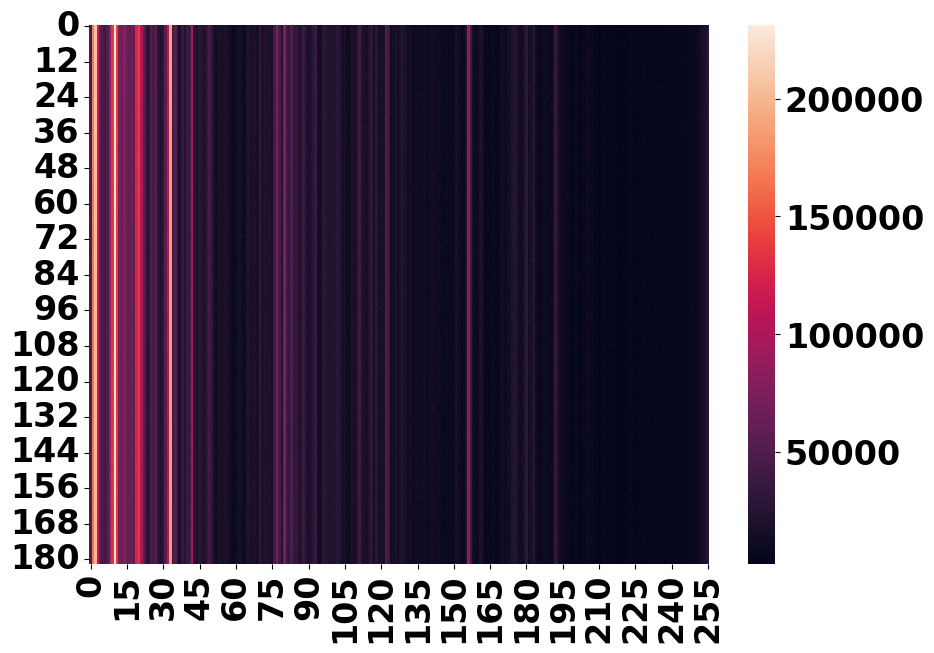

In [3]:
gen=point_cloud_frames(file_name ='./datasets/radar_data/drone_2024-09-10_16_12_18_test.bin')
total_data = []
total_ids = []
total_frames=0
first_frame = True
initial_coordinates = {}
current_cluster = {}
points = []
prev_point = np.array([0,0])
for pointcloud in gen:
    print(pointcloud.shape)
    print(pointcloud)
    break
    